In [1]:
import matplotlib as plt

In [2]:
import zipfile
import pandas as pd

# Defining the ZIP file path and the directory to extract to
zip_file = 'credit-card-approval-prediction.zip'
extract_dir = 'credit-card-data/'

# Opening the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # 2 files inside the ZIP
    zip_ref.printdir()
    
    # Extracting specific file, for example, 'application_record.csv'
    zip_ref.extract('application_record.csv', extract_dir)

# loading the extracted application file into a pandas DataFrame
application_df = pd.read_csv(f'{extract_dir}application_record.csv')
print(application_df.head())

# Extracting and loading credit file into a pandas DataFrame
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extract('credit_record.csv', extract_dir)

credit_df = pd.read_csv(f'{extract_dir}credit_record.csv')
print(credit_df.head())

File Name                                             Modified             Size
application_record.csv                         2020-03-24 10:05:00     54342959
credit_record.csv                              2020-03-24 10:05:02     15367102
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate

In [3]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
#Merging the two DataFrames on ID
merge_df = pd.merge(application_df, credit_df, on='ID', how='inner')

#Making a copy that won't be manipulated
copy_df = merge_df.copy()

merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

There are a mix of datatypes in our DataFrame. Some are objects and others are numeric (int or float). Occupation type is the only column with missing values. Some of these columns seem to be of little importance like phone numbers and emails.

In [7]:
#Getting info of numeric values
merge_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


We can see that the numeric values that have flag contain a 1 or a 0 which is used to indicate whether or not a phone or email was provided. From the data it is clear that everyone provided at least a mobile phone since the min and max are both 1.

There seems to be something weird going on with days employed. The description that came with the data indicates that a positive number indicates unemployment and a negative number shows the days employed. WHy the max is so large and the mean is positive warrants more investigation.

The max family member count of 20 also seems like and outlier thta needs to be handled.

In [8]:
#Let's look again at what values contain missing values.
merge_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

Only occupation type has missing values, so let's take a closer look at it.

In [9]:
merge_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: count, dtype: int64

<Axes: xlabel='OCCUPATION_TYPE'>

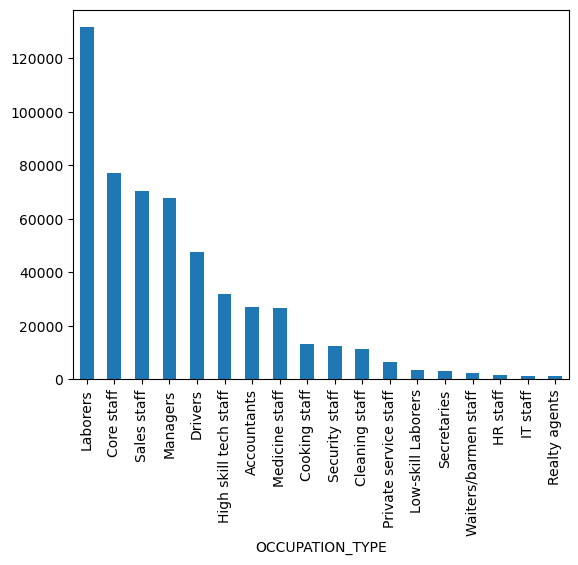

In [10]:
# Plot a bar chart for the categorical column
merge_df['OCCUPATION_TYPE'].value_counts().plot(kind='bar')


In [11]:
merge_df['OCCUPATION_TYPE'].value_counts(normalize=True) * 100


OCCUPATION_TYPE
Laborers                 24.470909
Core staff               14.341963
Sales staff              13.086539
Managers                 12.598504
Drivers                   8.867570
High skill tech staff     5.908490
Accountants               5.063171
Medicine staff            4.964225
Cooking staff             2.495225
Security staff            2.306260
Cleaning staff            2.120085
Private service staff     1.248728
Low-skill Laborers        0.673837
Secretaries               0.585678
Waiters/barmen staff      0.475573
HR staff                  0.313577
IT staff                  0.245319
Realty agents             0.234346
Name: proportion, dtype: float64

In [12]:
merge_df['OCCUPATION_TYPE'].isnull().sum() / len(merge_df) * 100

30.86580559716606

There are clearly quite a few options for occupation type, but none has more than 25% of all the values. With 30% of all values being marked null it suggests that we should delete the column rather than imputing by mode (making all null values laborers). Perhaps we will do a PCA analysis later to see if the values that are there for labor have a significant impact on grouping.

In [13]:
#Dropping the occupation column
merge_df = merge_df.drop('OCCUPATION_TYPE', axis=1)

merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C


Let's remove the email and phone flag columns while we're at it because they won't have any bearing on whether or not someone should or shouldn't be approved for a credit card. All entries have a mobile phone listed and only around 10% have an email listed. 

In [14]:
merge_df = merge_df.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_EMAIL','FLAG_PHONE'], axis=1)
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,-4,C


Let's go through the other categorical variables to see what there value types are, and to start thinking about how we will code them as numeric variables (one hot, or label encoding)

In [15]:
merge_df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

We can do label encoding for education status since there is an ordinal relationship between less and more education.

In [16]:
education_map = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

merge_df['education_numeric'] = merge_df['NAME_EDUCATION_TYPE'].map(education_map)

merge_df['education_numeric'].value_counts()

education_numeric
1    524261
3    213633
2     30329
0      8655
4       837
Name: count, dtype: int64

In [17]:
merge_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: count, dtype: int64

It probably makes sense to do one hot encoding for family statues because there isn't an ordinal relationship

In [18]:
merge_df = pd.get_dummies(merge_df, columns=['NAME_FAMILY_STATUS'])
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,education_numeric,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-12005,-4542,2.0,0,C,3,True,False,False,False,False
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-12005,-4542,2.0,-1,C,3,True,False,False,False,False
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-12005,-4542,2.0,-2,C,3,True,False,False,False,False
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-12005,-4542,2.0,-3,C,3,True,False,False,False,False
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-12005,-4542,2.0,-4,C,3,True,False,False,False,False


In [19]:
merge_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

No ordinal relationship so will be one hot encoding for income type

In [20]:
merge_df = pd.get_dummies(merge_df, columns=['NAME_INCOME_TYPE'])

In [21]:
merge_df['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

There isn't really any ordinality in housing type either, so we should do one-hot encoding.

In [22]:
merge_df = pd.get_dummies(merge_df, columns=['NAME_HOUSING_TYPE'])

In [23]:
merge_df['STATUS'].value_counts()

STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

We already see some ordinality for loan status, so we should try to keep it. We need to figure out how to treat the C value which corresponds to lone paid off for that month and X which corresponds to no lone for the month. 0-4 all correspond to days past due with 0 be least days past due and 5 being most. What makes the most sense to me is shifting values 0-5 up one so they are 1-6. For the non numeric values we will map x to 0 and c to -1

In [24]:
loan_map = {
    'C': -1,
    'X': 0,
    '0': 1,
    '1': 2,
    '2': 3,
    '3': 4,
    '4': 5,
    '5': 6,
}

merge_df['loan_numeric'] = merge_df['STATUS'].map(loan_map)

merge_df['loan_numeric'].value_counts()

loan_numeric
-1    329536
 1    290654
 0    145950
 2      8747
 6      1527
 3       801
 4       286
 5       214
Name: count, dtype: int64

Let's finish by turning binary categorical variables into numeric variables with 1 or 0. This includes, own car, gender, and realestate

In [25]:
merge_df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,loan_numeric
0,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
1,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
2,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
3,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
4,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1


In [26]:
merge_df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    473355
Y    304360
Name: count, dtype: int64

In [27]:
merge_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,loan_numeric
0,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
1,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
2,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
3,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1
4,5008804,M,Y,Y,0,427500.0,Higher education,-12005,-4542,2.0,...,False,False,True,False,False,False,False,True,False,-1


In [28]:
gender_map = {
    'M': 0,
    'F': 1
}

car_map = {
    'Y': 1,
    'N': 0
}

realty_map = {
    'Y': 1,
    'N': 0
}

merge_df['gender_numeric'] = merge_df['CODE_GENDER'].map(car_map)
merge_df['car_numeric'] = merge_df['FLAG_OWN_CAR'].map(car_map)
merge_df['realty_numeric'] = merge_df['FLAG_OWN_REALTY'].map(car_map)


Now let's remove all the original categorical columns so that we only have numeric values in our dataframe

In [29]:
merge_df = merge_df.drop(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'STATUS', 'NAME_EDUCATION_TYPE'], axis=1)

In [30]:
merge_df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'education_numeric',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'loan_numeric', 'gender_numeric', 'car_numeric', 'realty_numeric'],
      dtype='object')

Now let's check for duplicates

In [31]:
sum_duplicates = merge_df.duplicated().sum()
sum_duplicates

0

That's it for data wrangling. We went through the data checking for missing values which resulted in dropping one column of occupation types. We also converted categorical variables to numeric ones to help with running the models later. We checked for duplicates and outliers too of which there was none.